<a href="https://colab.research.google.com/github/yuguerten/Casablanca-housing/blob/main/housing_Casablanca_scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scrappe data from mubwabe

In [ ]:
!pip install requests
!pip install beautifulsoup4

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import string

In [2]:
base_url = "https://www.mubawab.ma/en/st/casablanca/apartments-for-sale:o:d:p:{}"

place = []
price = []
house_info = []
number_of_pages = 142

for page_number in range(1, number_of_pages + 1):
    url = base_url.format(page_number)
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')

    # Select reviews for the current page
    house = soup.select("#mainListing .floatR , .hardShadow , .listingH3")

    print("on page ", page_number, "data scrapped is a length of:", len(house))

    for i in range(0, len(house), 4):
        # Make sure the index is within the bounds of the reviews list
        if i + 2 < len(house):
            price.append(house[i + 1].get_text(strip=True))
            house_info.append(house[i + 2].get_text(strip=True))
            place.append(house[i+3].get_text(strip=True))
        else:
            print("Warning: Skipping incomplete house info on page", page_number)

on page  1 data scrapped is a length of: 132
on page  2 data scrapped is a length of: 132
on page  3 data scrapped is a length of: 132
on page  4 data scrapped is a length of: 132
on page  5 data scrapped is a length of: 132
on page  6 data scrapped is a length of: 132
on page  7 data scrapped is a length of: 132
on page  8 data scrapped is a length of: 132
on page  9 data scrapped is a length of: 132
on page  10 data scrapped is a length of: 132
on page  11 data scrapped is a length of: 132
on page  12 data scrapped is a length of: 132
on page  13 data scrapped is a length of: 132
on page  14 data scrapped is a length of: 132
on page  15 data scrapped is a length of: 132
on page  16 data scrapped is a length of: 132
on page  17 data scrapped is a length of: 132
on page  18 data scrapped is a length of: 132
on page  19 data scrapped is a length of: 132
on page  20 data scrapped is a length of: 132
on page  21 data scrapped is a length of: 132
on page  22 data scrapped is a length of: 1

In [ ]:
# len(place)
len(place)
#len(house_info)

4678

In [ ]:
print(house_info)

['3 bedrooms, 116 m²', '2 bedrooms, 142 m²', '3 bedrooms, 280 m²', '3 bedrooms, 110 m²', '2 bedrooms, 113 m²', '2 bedrooms, 109 m²', '3 bedrooms, 120 m²', '3 bedrooms, 222 m²', '2 bedrooms, 128 m²', '2 bedrooms, 128 m²', '3 bedrooms, 92 m²', '2 bedrooms, 80 m²', '1 bedroom, 63 m²', '2 bedrooms, 75 m²', '78 bedrooms, 4264 m²', '5 bedrooms, 290 m²', '2 bedrooms, 52 m²', '3 bedrooms, 62 m²', '10 bedrooms, 972 m²', '5 bedrooms, 897 m²', '14 bedrooms, 1350 m²', '2 bedrooms, 110 m²', '5 bedrooms, 700 m²', '4 bedrooms, 700 m²', '4 bedrooms, 423 m²', '5 bedrooms, 509 m²', '1 bedroom, 436 m²', '3 bedrooms, 320 m²', '3 bedrooms, 373 m²', '4 bedrooms, 360 m²', '1 bedroom, 50 m²', '3 bedrooms, 280 m²', '3 bedrooms, 280 m²', '4 bedrooms, 600 m²', '3 bedrooms, 410 m²', '2 bedrooms, 100 m²', '5 bedrooms, 748 m²', '3 bedrooms, 98 m²', '2 bedrooms, 82 m²', '5 bedrooms, 729 m²', '4 bedrooms, 425 m²', '4 bedrooms, 326 m²', '3 bedrooms, 96 m²', '5 bedrooms, 730 m²', '3 bedrooms, 204 m²', '5 bedrooms, 700 

In [3]:
def extract_bedrooms_area(info_str):
    # Use regular expression to extract the number of bedrooms and area
    match = re.search(r'(\d+)?\s*bedrooms,\s*(\d+)?\s*m²', info_str)

    # Extract bedrooms and area or return None for missing values
    bedrooms = match.group(1) if match and match.group(1) else None
    area = match.group(2) if match and match.group(2) else None

    return bedrooms, area
bedrooms_list, area_list = zip(*[extract_bedrooms_area(info) for info in house_info])

In [4]:
len(bedrooms_list)

4681

In [ ]:
area_list

In [5]:
data = {
    'place' : place,
    'house_price(DH)' : price,
    'bedrooms' : bedrooms_list,
    'house_area(m²)' : area_list
}
housing_Casablanca = pd.DataFrame(data)

In [6]:
housing_Casablanca.head()

,place,house_price(DH),bedrooms,house_area(m²)
0,Oulfa in\n \t\t\t\t\tCasablanca,"980,000,000 DH",3,116
1,Casablanca Marina in\n \t\t\t\t\tCasablanca,"530,000,000 DH",2,142
2,Ain Diab in\n \t\t\t\t\tCasablanca,"450,000,000 DH",3,280
3,Anfa Supérieur in\n \t\t\t\t\tCasablanca,"165,000,000 DH",3,110
4,Les Hôpitaux in\n \t\t\t\t\tCasablanca,"156,000,000 DH",2,113


In [7]:
housing_Casablanca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4681 entries, 0 to 4680
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   place            4681 non-null   object
 1   house_price(DH)  4681 non-null   object
 2   bedrooms         4203 non-null   object
 3   house_area(m²)   4203 non-null   object
dtypes: object(4)
memory usage: 146.4+ KB


# cleaning the dataset scrapped

In [8]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [9]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\t','',text)
    text = re.sub('casablanca', '',text)
    # text = re.sub('in' , '' ,text)
    return text

round2 = lambda x: clean_text_round2(x)

In [10]:
housing_Casablanca['place'] = housing_Casablanca['place'].apply(round1)

In [11]:
housing_Casablanca.head()

,place,house_price(DH),bedrooms,house_area(m²)
0,oulfa in\n \t\t\t\t\tcasablanca,"980,000,000 DH",3,116
1,casablanca marina in\n \t\t\t\t\tcasablanca,"530,000,000 DH",2,142
2,ain diab in\n \t\t\t\t\tcasablanca,"450,000,000 DH",3,280
3,anfa supérieur in\n \t\t\t\t\tcasablanca,"165,000,000 DH",3,110
4,les hôpitaux in\n \t\t\t\t\tcasablanca,"156,000,000 DH",2,113


In [12]:
housing_Casablanca['place'] = housing_Casablanca['place'].apply(round2)

In [13]:
housing_Casablanca['house_price(DH)'] = pd.to_numeric(housing_Casablanca['house_price(DH)'].str.replace(',', '').str.replace(' DH', ''), errors='coerce')

In [14]:
housing_Casablanca.head()

,place,house_price(DH),bedrooms,house_area(m²)
0,oulfa in,980000000.0,3,116
1,marina in,530000000.0,2,142
2,ain diab in,450000000.0,3,280
3,anfa supérieur in,165000000.0,3,110
4,les hôpitaux in,156000000.0,2,113


In [15]:
housing_Casablanca['place']  = housing_Casablanca['place'].str.replace(' in ','')

In [17]:
housing_Casablanca = housing_Casablanca.drop(housing_Casablanca[housing_Casablanca['place'].str.strip() == 'oulfa'].index)

In [18]:
housing_Casablanca.head()

,place,house_price(DH),bedrooms,house_area(m²)
1,marina,530000000.0,2,142
2,ain diab,450000000.0,3,280
3,anfa supérieur,165000000.0,3,110
4,les hôpitaux,156000000.0,2,113
5,les hôpitaux,140000000.0,2,109


In [19]:
housing_Casablanca = housing_Casablanca.dropna()

In [20]:
housing_Casablanca['bedrooms'] = housing_Casablanca['bedrooms'].astype(float)
housing_Casablanca['house_area(m²)'] = housing_Casablanca['house_area(m²)'].astype(float)

In [21]:
housing_Casablanca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3945 entries, 1 to 4680
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   place            3945 non-null   object 
 1   house_price(DH)  3945 non-null   float64
 2   bedrooms         3945 non-null   float64
 3   house_area(m²)   3945 non-null   float64
dtypes: float64(3), object(1)
memory usage: 154.1+ KB


# Exploratory Data Analysis and Data visualization

In [27]:
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
housing_Casablanca.describe()

*theorem central limit*

In [24]:
price_mean = housing_Casablanca['house_price(DH)'].mean()
price_std = housing_Casablanca['house_price(DH)'].std()

In [25]:
housing_Casablanca['normalized_house_price'] = (housing_Casablanca['house_price(DH)'] - price_mean) / price_std

In [28]:

fig = px.bar(housing_Casablanca, x='place', y='normalized_house_price', color='place',
             labels={'normalized_house_price': 'Normalized House Price', 'place': 'Place'},
             title='House Price for Each Region in Casablanca')

fig.update_layout(xaxis=dict(tickangle=-45))
fig.show()


<ipython-input-29-7978f6042107>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

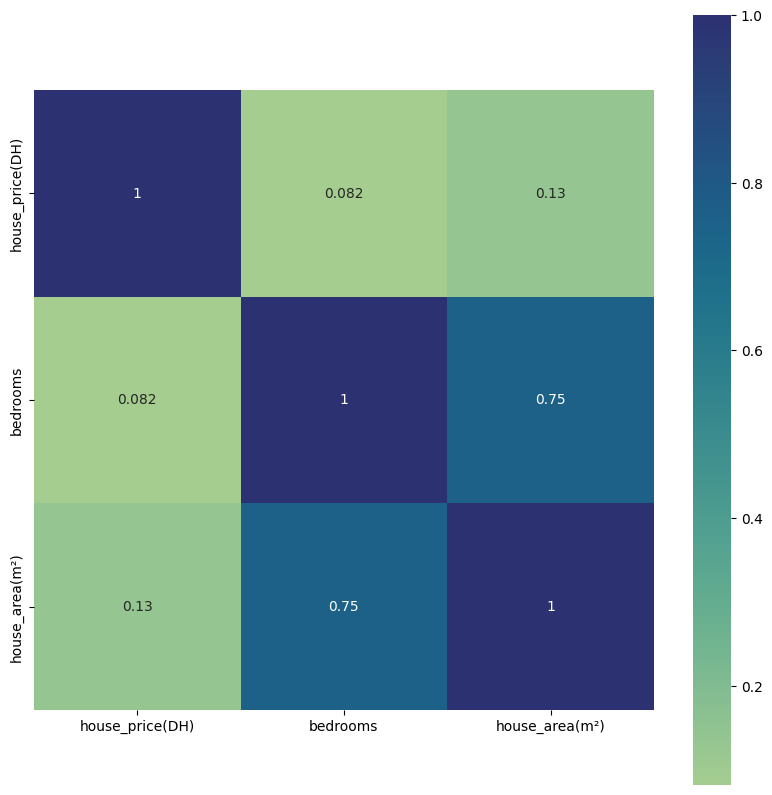

In [29]:
columns_to_exclude = ['normalized_house_price']
correlation_matrix = housing_Casablanca.drop(columns=columns_to_exclude).corr()
plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix,cmap= "crest",annot=True,square=True, )

***interpretation:*** we expecting that we will have a solid correlation betweeen house price and house area it's not the case in our casablanca we can rise a question is the data from the website is well structured well published !!!!

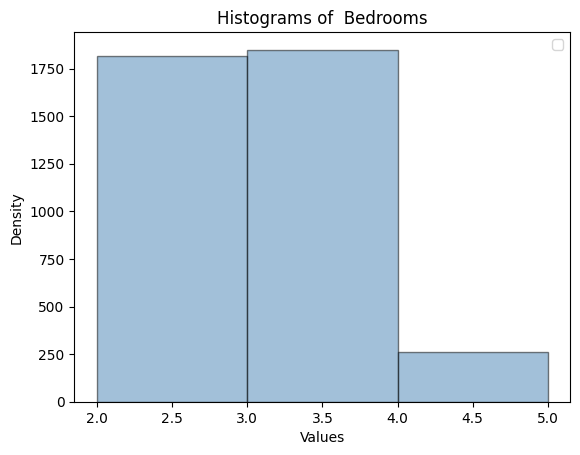

In [30]:
bin_edges = [2, 3, 4, 5]

plt.hist(housing_Casablanca['bedrooms'], bins=bin_edges,
         alpha=0.5,
         histtype='bar',
         color='steelblue',
         edgecolor='black');
plt.legend()
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histograms of  Bedrooms')
plt.show()

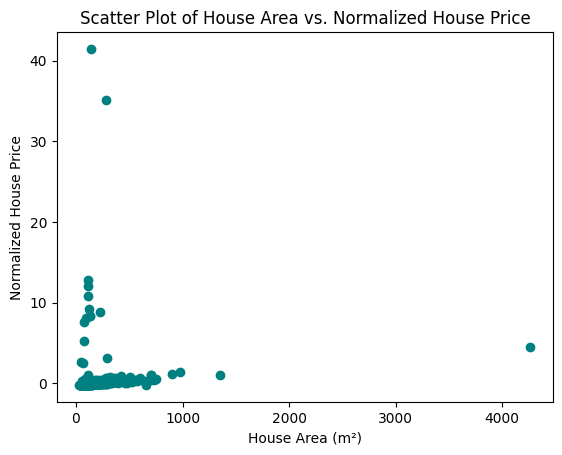

In [32]:
plt.scatter(housing_Casablanca['house_area(m²)'], housing_Casablanca['normalized_house_price'], color='teal')
plt.xlabel('House Area (m²)')
plt.ylabel('Normalized House Price')
plt.title('Scatter Plot of House Area vs. Normalized House Price')
# plt.xlim(20, 4500)

plt.show()
